In [5]:
import lancedb
import pyarrow as pa
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
from io import BytesIO
from pyarrow import schema, field, float32, string, utf8
import pandas as pd
import json
from datetime import datetime
from lancedb.pydantic import LanceModel, Vector
import numpy as np
from pydantic import BaseModel
import os


In [6]:
# get the clip model and processor

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

db = lancedb.connect("./my_lancedb")

In [7]:
table_name = "my_table"

def load_table():
    return db.open_table(table_name)

def embedding_from_text(query):
    text_inputs = processor(text=query, return_tensors="pt", truncation=True)
    query_vector = model.get_text_features(**text_inputs)
    return query_vector[0].detach().numpy()

def embedding_from_image(image_path):
    img = Image.open(image_path).convert('RGB')
    inputs = processor(images=img, return_tensors="pt")
    image_vector = model.get_image_features(**inputs)
    return image_vector[0].detach().numpy()

def search_lancedb(query_vector):
    tbl = load_table()
    results = tbl.search(query_vector).metric('cosine').nprobes(10).limit(10).to_pandas()
    return results

Search results for text query:
Product Title: FASHION SILK SAREE (GREEN)
Image Path: images/train/4128.jpeg



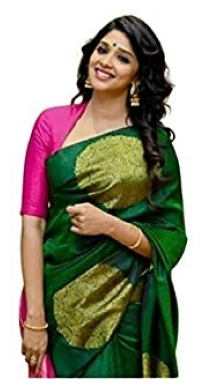

Product Title: Green Banarasi Silk Saree With Blouse Peice
Image Path: images/train/6838.jpeg



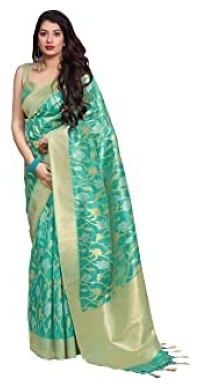

Product Title: KOTA GHICHA SAREE GREEN WITH BLOUSE TRANSPARANT
Image Path: images/train/7809.jpeg



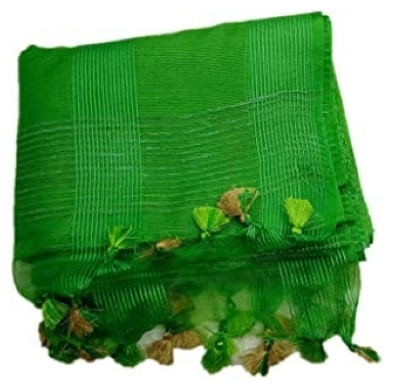

Product Title: Silk Saree with Blouse Piece (GREEN-BANDAN_Green_Free Size)
Image Path: images/train/5115.jpeg



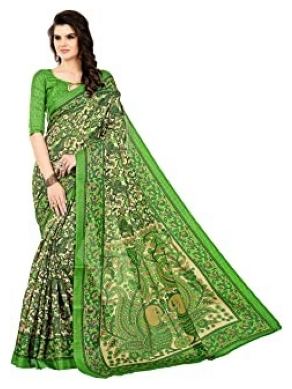

Product Title: Women's Silk Saree With Blouse Piece (A44 GREEN _Green)
Image Path: images/train/2888.jpeg



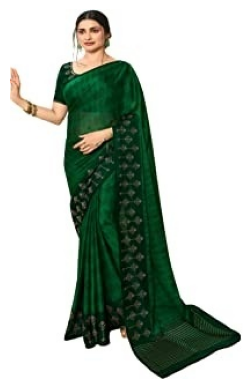

Product Title: art silk with blouse piece Saree (STAR-GREEN Free Size)
Image Path: images/train/2599.jpeg



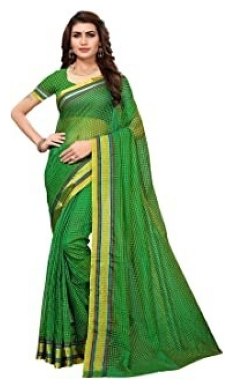

Product Title: Banarasi Style Chiffon saree Color: Green
Image Path: images/train/5285.jpeg



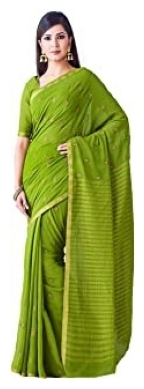

Product Title: Women's Green Silk Saree With Blouse
Image Path: images/train/2160.jpeg



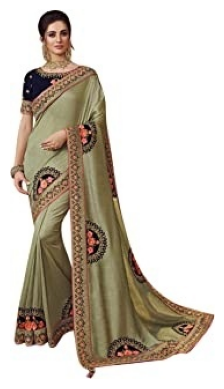

Product Title: For Women Free Size Green Colour Linen Sari (s189697)
Image Path: images/train/6971.jpeg



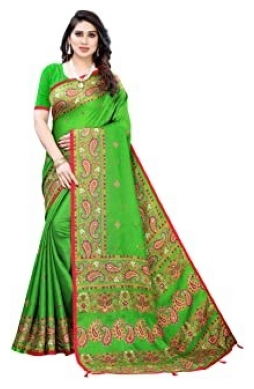

Product Title: Kanjivaram Style Art Silk Saree Color : Green
Image Path: images/train/8464.jpeg



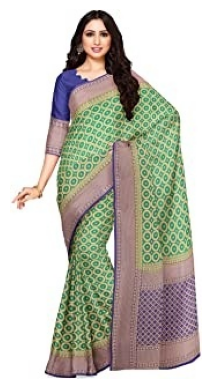

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# example 1: Text Search
text_query = "Green Silk Saree"
text_query_vector = embedding_from_text(text_query)
search_results = search_lancedb(text_query_vector)  # Use the updated search function

print("Search results for text query:")
for index, row in search_results.iterrows():
    print(f"Product Title: {row['payload']['meta']['product_title']}")
    image_path = row['payload']['meta']['image_path']
    print(f"Image Path: {image_path}\n")
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Search results for image query:
Product Title: Women's Leather Punjabi/Mojari Jutti Design-49
Image Path: images/test/4618.jpeg



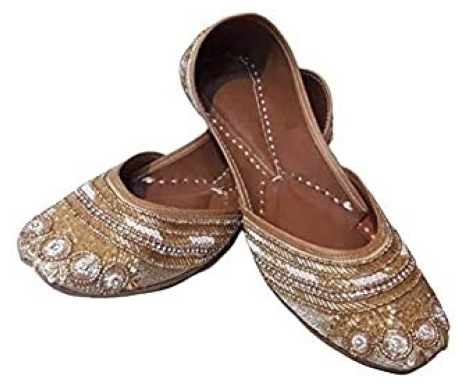

Product Title: Men's Leather Kolhapuri Sandal/Chappal - Handcrafted Kurundawadi Design
Image Path: images/test/4070.jpeg



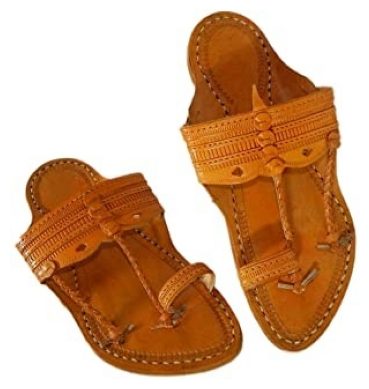

Product Title: Women's Leather Ethnic Kolhapuri Chappal - Kapashi Curvy Strap
Image Path: images/test/4580.jpeg



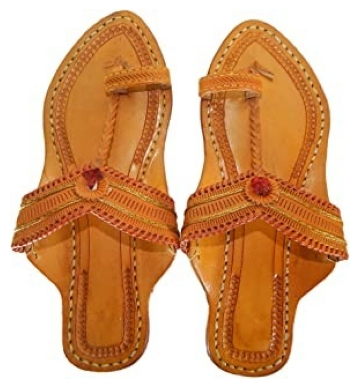

Product Title: Rajasthani Jaipuri Work Kolhapuri Ethnic Womens Girls Ladies Slipper
Image Path: images/test/4835.jpeg



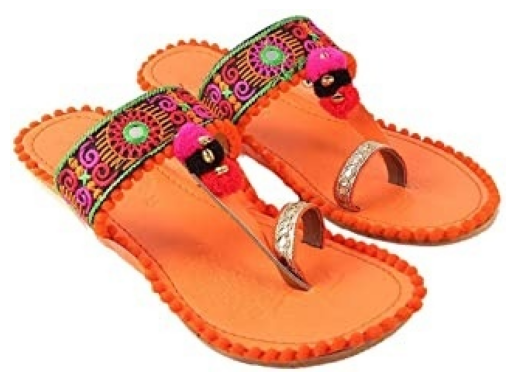

Product Title: Mens Leather Black Chatai Jutti (7)
Image Path: images/test/4569.jpeg



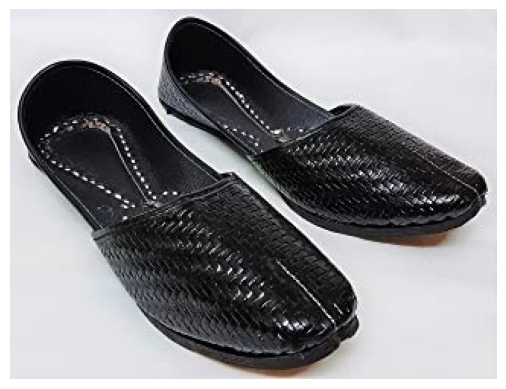

Product Title: Men's Mojari For Men
Image Path: images/test/4229.jpeg



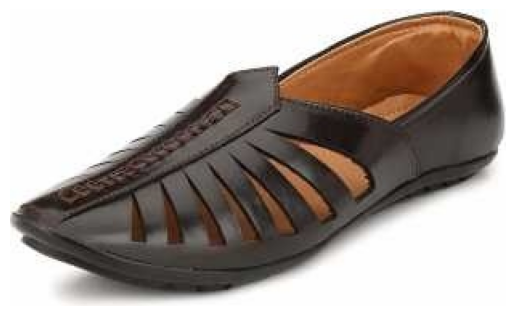

Product Title: Women's Phulkari Multicolor Genuine Soft Leather Juttis | Bite and Pinch Free Jutis | Punjabi Jutti for Ladies| Wedding Flat Stylish Mojari | Bridal Ethnic Flats for Girls |
Image Path: images/test/4845.jpeg



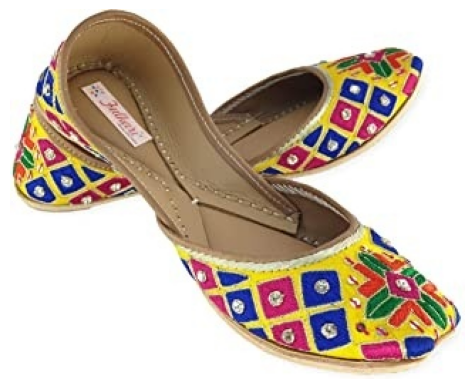

Product Title: Rajasthani Jaipuri Work Kolhapuri Ethnic Womens Girls Ladies Slipper
Image Path: images/test/4886.jpeg



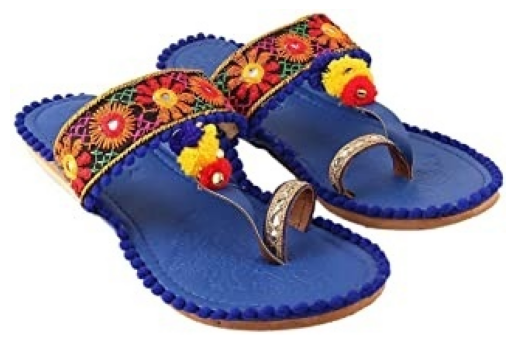

Product Title: Women's Mjanta Traditional Jutti by SPF-1484
Image Path: images/test/4704.jpeg



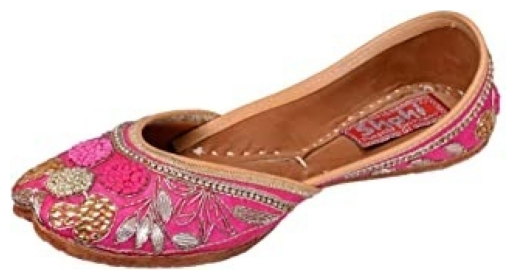

Product Title: Women's Fashion Sandal
Image Path: images/test/4818.jpeg



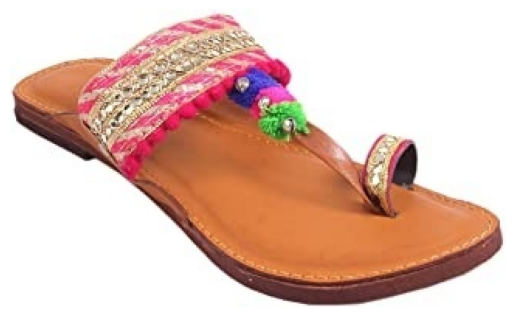

In [ ]:
image_query_path = r""
image_vector = embedding_from_image(image_query_path)
image_search_results = search_lancedb(image_vector)  # Use the updated search function

print("Search results for image query:")
for index, row in image_search_results.iterrows():
    print(f"Product Title: {row['payload']['meta']['product_title']}")
    image_path = row['payload']['meta']['image_path']
    print(f"Image Path: {image_path}\n")
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()